### Import necessary package

In [1]:
import numpy as np
import pandas as pd

import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words('indonesian') + list(punctuation)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import sklearn.metrics
from jcopml.pipeline import num_pipe, cat_pipe

In [4]:
df = pd.read_csv('./Data Latih BDC.csv')
df['teks'] = df['judul'] + ' ' + df['narasi']
df.drop(columns=['ID', 'tanggal', 'nama file gambar', 'judul', 'narasi'], inplace=True)

In [5]:
df.head()

,label,teks
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,1,Instruksi Gubernur Jateng tentang penilangan ...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin K...


### Dataset Splitting

In [6]:
X = df.teks
y = df.label

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3173,), (1058,), (3173,), (1058,))

### Creating Pipeline for Training

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('prep', CountVectorizer(tokenizer = word_tokenize, stop_words = sw_indo)),
    ('algo', XGBClassifier(n_jobs = -1, random_state = 42))
])

### Training with Hyperparameter Tuning

In [8]:
from skopt import BayesSearchCV
from jcopml.tuning import bayes_search_params as bsp

model = BayesSearchCV(pipeline, bsp.xgb_params, cv=4, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_val, y_val))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.7s finished


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.5s finished
D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
D:\MUTHIA\Anaconda\envs\jcopml\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


OrderedDict([('algo__colsample_bytree', 0.8195980974464558), ('algo__gamma', 5), ('algo__learning_rate', 0.11304216699488043), ('algo__max_depth', 7), ('algo__n_estimators', 190), ('algo__reg_alpha', 0.738115974661544), ('algo__reg_lambda', 0.04974074547470406), ('algo__subsample', 0.6251420508738813)])
0.8651118815001576 0.8506145603529782 0.8412098298676749


### Validating the Model and Calculating F1-Score

In [8]:
y_pred = model.predict(X_val)

f1 = sklearn.metrics.f1_score(y_val, y_pred)
print(f1)

0.9149972929074174


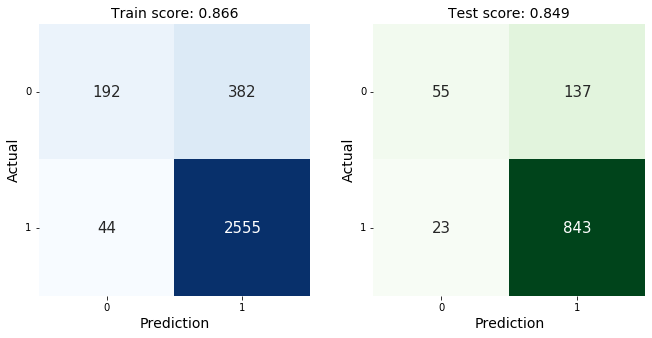

In [25]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train, y_train, X_val, y_val, model)

### Testing the Model

In [9]:
test_df = pd.read_csv('./Data Uji BDC.csv')
test_df.drop(columns=['ID', 'tanggal', 'nama file gambar'], inplace=True)
test_df['teks'] = test_df['judul'] + ' ' + test_df['narasi']

print(test_df.head())

                                               judul  \
0  Narasi Tito Karnavian Berideologi Komunis Kare...   
1  Anies: Seberat beratnya Pekerjaan Akan terasa ...   
2  Hindu di india Melemparkan Patung Buatan Merek...   
3  RSCM Praktekkan Penyedotan Plug  Vena/Saluran ...   
4             Permohonan Kelonggaran Angsuran ke OJK   

                                              narasi  \
0  TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...   
1  Seberat beratnya Pekerjaan Akan terasa ringan ...   
2  Hindu di india melemparkan patung buatan merek...   
3  Mulai Hari ini di RSCM mulai diPraktekkan Peny...   
4  Untuk sekedar info, Bagi anda yg punya ansuran...   

                                                teks  
0  Narasi Tito Karnavian Berideologi Komunis Kare...  
1  Anies: Seberat beratnya Pekerjaan Akan terasa ...  
2  Hindu di india Melemparkan Patung Buatan Merek...  
3  RSCM Praktekkan Penyedotan Plug  Vena/Saluran ...  
4  Permohonan Kelonggaran Angsuran ke OJK Untuk s..

In [27]:
pred = model.predict(test_df.teks)
print(pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]
